In [1]:
#예측 모델
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import lightgbm as lgb

#기초 모듈
import numpy as np
import pandas as pd


#평가지표
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#그림
import seaborn as sns
import matplotlib.pyplot as plt
#ignore warning
import warnings
warnings.filterwarnings("ignore")
#GridsearchCV

In [2]:
#일별 방류량 데이터  모아보기
SJoutflux=pd.DataFrame()
for x in ["20170601-20180531", "20180601-20190531", "20190601-20200531", "20200601-20210531", "20210601-20220523"]:

    filedir="C:/Users/infec/Desktop/수자원공사 공모전/방류량 정보/"+x+".xlsx"
    outflux=pd.read_excel(filedir, header=2, parse_dates=["Unnamed: 0"])
    outflux.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
    outflux.set_index("Date", inplace=True)
    outflux=outflux.loc[:, ["섬진강", "주암댐"]]
    SJoutflux=pd.concat([SJoutflux, outflux], axis=0)

Text(0.5, 1.0, 'SeomJinDam Discharge')

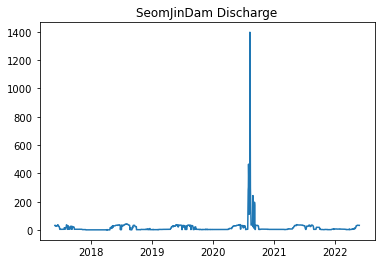

In [3]:
motherdir2="C:/Users/infec/Desktop/수자원공사 공모전/사진파일/"

plt.plot(SJoutflux["섬진강"])
plt.title("SeomJinDam Discharge")
#plt.savefig(motherdir2+"섬진강 방류량", dpi=200)

In [4]:

engdir=["GC", "BS", "SU", "YC", "PN", "HM"]
heightdf2021=pd.DataFrame()
motherdir="C:/Users/infec/Desktop/수자원공사 공모전/지역별 수위자료(2개년)/"
motherdir2="C:/Users/infec/Desktop/수자원공사 공모전/사진파일/"
dirlist2021=["광천교 2021", "보성군 2021", "수어천교 2021", "요천대교 2021", "평남리 2021", "회문리 2021"]
dirlist2020=["광천교 2020", "보성군 2020", "수어천교 2020", "요천대교 2020", "평남리 2020", "회문리 2020"]
dirlist2019=["광천교 2019", "보성군 2019", "수어천교 2019", "요천대교 2019", "평남리 2019", "회문리 2019"]
#2021 수위 자료 추출
for misty in dirlist2021:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2021-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2021=pd.concat([heightdf2021, height ], axis=1)
    
heightdf2021.columns=engdir 

heightdf2021.index=pd.to_datetime(heightdf2021.index)
print(heightdf2021)

              GC    BS    SU      YC      PN    HM
관측일                                               
2021-06-21  1.10  2.12  3.02  2.2071  1.6217  0.61
2021-06-22  1.10  2.12  3.04  2.1925  1.6188  0.61
2021-06-23  0.64  2.13  3.05  2.1813  1.6300  0.61
2021-06-24  1.09  2.12  3.01  2.2971  1.6171  0.61
2021-06-25  1.09  2.11  3.05  2.2317  1.6129  0.61
...          ...   ...   ...     ...     ...   ...
2021-09-16  0.97  2.16  3.00  2.0929  1.6038  0.67
2021-09-17  0.65  2.17  3.25  2.1021  1.6092  0.67
2021-09-18  0.64  2.15  3.33  2.0971  1.6063  0.67
2021-09-19  0.65  2.13  3.08  2.0892  1.5796  0.67
2021-09-20  0.64  2.13  3.14  2.0917  1.5625  0.66

[92 rows x 6 columns]


In [5]:
#2019년 수위 자료 추출 
heightdf2019=pd.DataFrame()
for misty in dirlist2019:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2019-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2019=pd.concat([heightdf2019, height ], axis=1)
    
heightdf2019.columns=engdir 

heightdf2019.index=pd.to_datetime(heightdf2019.index)
print(heightdf2019)

              GC    BS    SU      YC      PN    HM
관측일                                               
2019-06-21  0.41  2.14  3.32  2.0721  1.2500  0.77
2019-06-22  0.41  2.11  3.31  2.0821  1.2417  0.76
2019-06-23  0.41  2.15  3.25  2.3975  1.2500  0.76
2019-06-24  0.62  2.15  3.32  2.1104  1.2400  0.76
2019-06-25  1.05  2.18  3.14  2.0792  1.2400  0.77
...          ...   ...   ...     ...     ...   ...
2019-09-16  0.95  2.24  3.46  2.3442  1.3696  0.79
2019-09-17  0.95  2.23  3.43  2.3496  1.3513  0.78
2019-09-18  0.94  2.23  3.35  2.3279  1.3400  0.78
2019-09-19  0.94  2.22  3.33  2.3158  1.3400  0.78
2019-09-20  0.94  2.45  3.28  2.3563  1.3346  0.78

[92 rows x 6 columns]


In [6]:
#2020년 수위 추출 
heightdf2020=pd.DataFrame()
for misty in dirlist2020:
    filename=motherdir+misty+".xls"
    height=pd.read_excel(filename, parse_dates=["관측일"] )
    height.set_index(["관측일"], inplace=True)
    height=height.loc[:"2020-06-21", ["평균수위"]]
    height.sort_index(ascending=True, inplace=True)
    heightdf2020=pd.concat([heightdf2020, height ], axis=1)
    
heightdf2020.columns=engdir 

heightdf2020.index=pd.to_datetime(heightdf2020.index)
heightdf2020=heightdf2020.loc[:"2020-09-20"]
print(heightdf2020)

              GC    BS    SU      YC      PN    HM
관측일                                               
2020-06-21  1.12  2.33  3.44  2.0921  1.3429  0.74
2020-06-22  1.12  2.41  3.41  2.0717  1.3079  0.73
2020-06-23  0.85  2.41  3.42  2.0746  1.2858  0.73
2020-06-24  0.46  2.54  3.49  2.1329  1.3008  0.72
2020-06-25  0.46  2.58  3.43  2.1446  1.3563  0.73
...          ...   ...   ...     ...     ...   ...
2020-09-16  1.11  2.50  3.53  2.3321  1.7988  0.65
2020-09-17  1.11  2.50  3.58  2.2954  1.7663  0.62
2020-09-18  1.11  2.49  3.59  2.2858  1.7729  0.70
2020-09-19  1.11  2.44  3.58  2.2554  1.7254  0.61
2020-09-20  1.11  2.28  3.53  2.2392  1.7300  0.64

[92 rows x 6 columns]


In [7]:
#TLCC를 활용하기 위한 함수 작성
def crosscorr(datax, datay, lag=0, wrap=False):
    
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag).dropna())
def SJmovingseries(series, window):
    return series.rolling(window=window).mean()[window:]
def SJoffsetplot2021(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2021-05-21":"2021-09-10"]
    d2=heightdf2021[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)
    
    
def SJoffsetplot2020(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2020-05-21":"2020-09-10"]
    d2=heightdf2020[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)

def SJoffsetplot2019(point,lags1, lags2, avdate):   
    empty=[] 
    d1=SJmovingseries(SJoutflux["섬진강"], avdate)["2019-05-21":"2019-09-10"]
    d2=heightdf2019[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")
    plt.axhline(0)    
    
#사용법: data는 heightdf2021 등, 시작날짜 끝날짜는 알아서 연도에 맞게. 
def SJoffsetdf(dirs, lags1, lags2, data, start="", end="" ):
    global fullsetdf, empty
    d1=SJmovingseries(SJoutflux["섬진강"], 5)[start:end]
    for i in dirs:
        
        d2=data[i]
        for lags in range(lags1,lags2+1):
            x=crosscorr(d1, d2, lags)
            empty.append([i, lags, x])
        offsetdf=pd.DataFrame(empty, columns=["point", "lags", "Corr"])
        fullsetdf=pd.concat([fullsetdf, offsetdf], axis=0)

    return fullsetdf


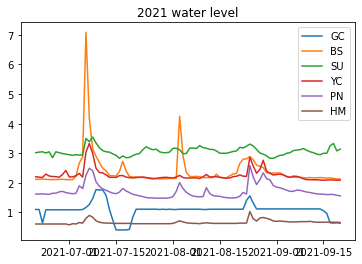

In [8]:
#기본적인 수위 자료 플로팅 
plt.title("2021 water level")
for s in heightdf2021.columns:
    plt.plot(heightdf2021[s], label=s)
    plt.legend(loc="best")
#plt.savefig(motherdir2+"2021waterlevel", dpi=200)

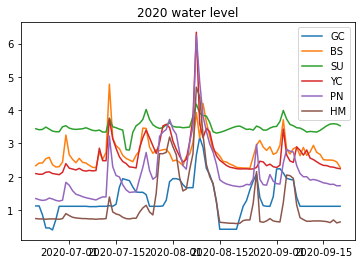

In [9]:
plt.title("2020 water level")
for s in heightdf2020.columns:
    plt.plot(heightdf2020[s], label=s)
    plt.legend(loc="best")
#plt.savefig(motherdir2+"2020waterlevel", dpi=200)

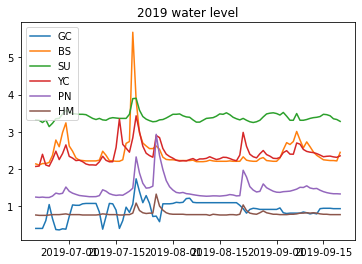

In [10]:
plt.title("2019 water level")
for s in heightdf2019.columns:
    plt.plot(heightdf2019[s], label=s)
    plt.legend(loc="best")
#plt.savefig(motherdir2+"2019waterlevel", dpi=200)

In [11]:
#2021년 
dummylist=[]
alllist=[]
avdate=[1, 2, 3, 4, 5, 6, 10]
for days in avdate:
    for dirname in engdir:
        data2=heightdf2021[dirname]
        
        data1=SJmovingseries(SJoutflux["섬진강"], days)["2021-05-21":"2021-09-10"]
        
            
        rs= [crosscorr(data1, data2, lags) for lags in range(-30, 30)]
        offset=np.argmax(rs)-np.floor(30)
        dummylist.append([days, dirname, np.array(rs).max(), offset])
        
SJtoHeight2021=pd.DataFrame(dummylist, columns=["avdate", "Point", "Corr", "offset"])


Text(0, 0.5, 'Correlation')

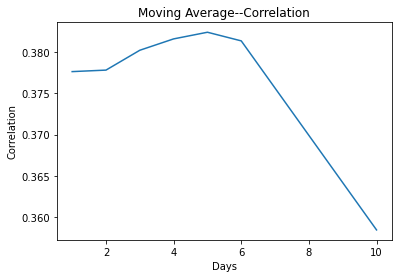

In [12]:
plt.title("Moving Average--Correlation")
plt.plot(SJtoHeight2021.groupby(["avdate"])["Corr"].mean())
plt.xlabel("Days")
plt.ylabel("Correlation")
#plt.savefig(motherdir2+"Movingavg", dpi=200)
#이동평균을 하는 것은 4~5일이 가장 적당함.

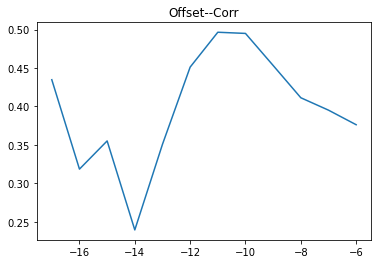

In [13]:
plt.title("Offset--Corr")
plt.plot(SJtoHeight2021.groupby(["offset"])["Corr"].mean())
#offset이 11. 즉 섬진강댐의 방류 11일 후 지점들의 피해를 잘 보자는 것

In [14]:
#5일로 이평일을 설정한 뒤, crosscorr 전체정보 다 알아보자

Text(0.5, 1.0, '2021 Seomjin Lags-Correlation')

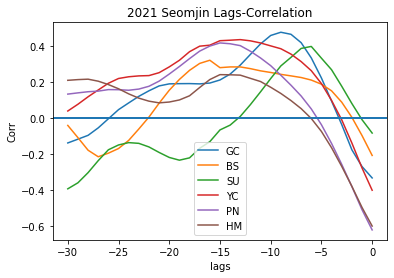

In [15]:
for dirname in engdir:
    SJoffsetplot2021(dirname, -30, 0, 5)
plt.title("2021 Seomjin Lags-Correlation")
#plt.savefig(motherdir2+"2021 SJ LAG-corr", dpi=200)

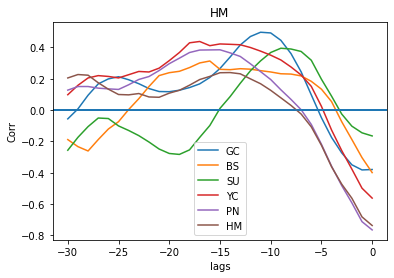

In [16]:
for dirname in engdir:
    SJoffsetplot2021(dirname, -30, 0, 1)

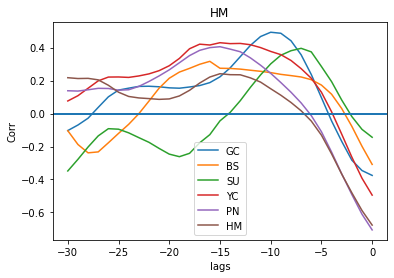

In [17]:
for dirname in engdir:
    SJoffsetplot2021(dirname, -30, 0, 3)

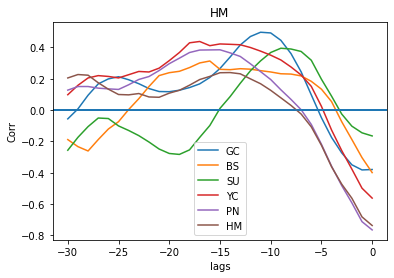

In [18]:
for dirname in engdir:
    SJoffsetplot2021(dirname, -30, 0, 1)
#이동평균선을 설정하는 데 있어 큰 차이는 없는 것으로 보임. 

Text(0.5, 1.0, '2020 Seomjin Lags-Correlation')

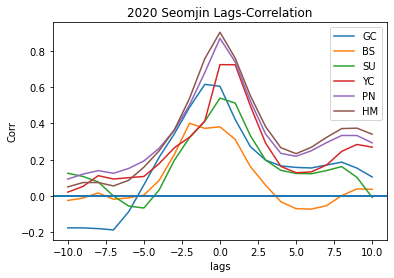

In [19]:
#이 그림에서 볼 수 있듯이 2020년의 데이터는 예측하기 힘들었던 강수 변수 때문에 lag이 없는. 즉 폭우와 그에 따른 대처가 동시다발적으로 이루어졌음을 알 수 있음. 
for dirname in engdir:
    SJoffsetplot2020(dirname, -10, 10, 1)
plt.title("2020 Seomjin Lags-Correlation")
#plt.savefig(motherdir2+"2020 SJ LAG-corr", dpi=200)

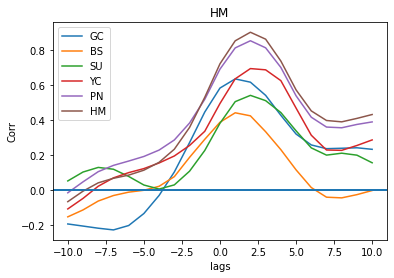

In [20]:
for dirname in engdir:
    SJoffsetplot2020(dirname, -10, 10, 5)

Text(0.5, 1.0, '2019 Seomjin Lags-Correlation')

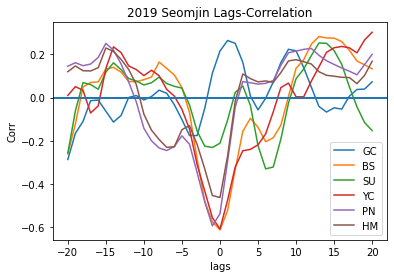

In [21]:
for dirname in engdir:
    SJoffsetplot2019(dirname, -20, 20, 1 )
plt.title("2019 Seomjin Lags-Correlation")
#plt.savefig(motherdir2+"2019 SJ LAG-corr", dpi=200)

In [22]:
#2019년 
dummylist=[]
alllist=[]
avdate=[1, 2, 3, 4, 5, 6, 10]
for days in avdate:
    for dirname in engdir:
        data2=heightdf2019[dirname]
        
        data1=SJmovingseries(SJoutflux["섬진강"], days)["2019-05-21":"2019-09-10"]
        
            
        rs= [crosscorr(data1, data2, lags) for lags in range(-30, 30)]
        offset=np.argmax(rs)-np.floor(30)
        dummylist.append([days, dirname, np.array(rs).max(), offset])
        
SJtoHeight2019=pd.DataFrame(dummylist, columns=["avdate", "Point", "Corr", "offset"])


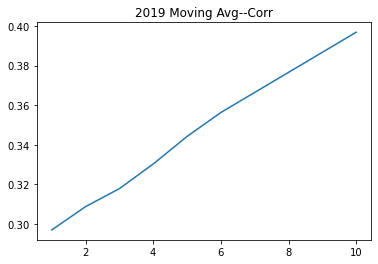

In [23]:
plt.title("2019 Moving Avg--Corr")
plt.plot(SJtoHeight2019.groupby(["avdate"])["Corr"].mean())
#이동평균을 하는 것은 4~5일이 가장 적당함.

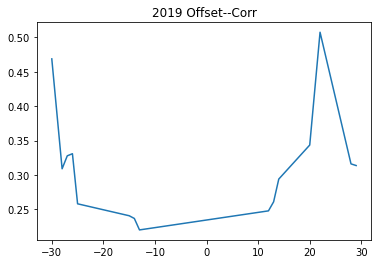

In [24]:
plt.title("2019 Offset--Corr")
plt.plot(SJtoHeight2019.groupby(["offset"])["Corr"].mean())
#offset이 11. 즉 섬진강댐의 방류 11일 후 지점들의 피해를 잘 보자는 것
#0.237이 상관계수. -11일때. 

In [25]:
#섬진강댐의 영향은 -11일, 이동평균선 5일을 활용하자가 결론 

In [26]:
#주암댐의 영향 파악 
fullsetdf=pd.DataFrame()
empty=[]
def JAoffsetdf(dirs, lags1, lags2, days, data=None, start="", end=""):
    global fullsetdf, empty
    for day in days:
        d1=SJmovingseries(SJoutflux["주암댐"], day)[start:end]
        for i in dirs:
            if i not in ["PN", "HM"]:
        
                d2=data[i]
                for lags in range(lags1,lags2+1):
                    x=crosscorr(d1, d2, lags)
                    empty.append([i, lags, x, day])
                offsetdf=pd.DataFrame(empty, columns=["point", "lags", "Corr", "avdate"])
                fullsetdf=pd.concat([fullsetdf, offsetdf], axis=0)
            else:
                pass

    return fullsetdf

In [27]:
JA2021=JAoffsetdf(engdir, -10, 10, [1, 2, 3, 4, 5], heightdf2021, "2021-05-21", "2021-09-10")

In [28]:
def JAoffsetplot(point,lags1, lags2, data=None, start="", end=""):
    empty=[]
    d1=SJmovingseries(SJoutflux["주암댐"], 5)[start:end]
    d2=data[point]
    for lags in range(lags1,lags2+1):
        x=crosscorr(d1, d2, lags)
        empty.append([lags, x])

    offsetdf=pd.DataFrame(empty, columns=["lags", "x"])
    offsetdf.set_index(["lags"], inplace=True)
    plt.plot(offsetdf, label=point)
    plt.title(point)
    plt.xlabel("lags")
    plt.ylabel("Corr")
    plt.legend(loc="best")

Text(0.5, 1.0, '2021 Juam Dam Lags-Correlation')

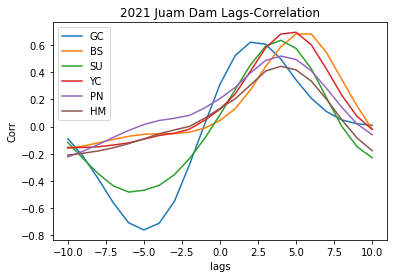

In [29]:
for dirname in engdir:
    
    JAoffsetplot(dirname, -10, 10, heightdf2021, "2021-05-21", "2021-09-10")
    
plt.title("2021 Juam Dam Lags-Correlation")
#plt.savefig(motherdir2+"2021 JA LAG-corr", dpi=200)

Text(0, 0.5, 'Average corr')

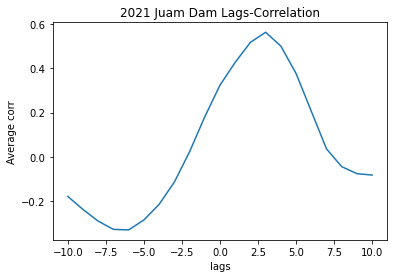

In [30]:
plt.plot(JA2021.groupby(["lags"])["Corr"].mean())
plt.title("2021 Juam Dam Lags-Correlation")
plt.xlabel("lags")
plt.ylabel("Average corr")
#plt.savefig(motherdir2+"2021 JA lag-Average Correlation", dpi=200)

Text(0.5, 1.0, '2021 Juam \n Best lag: 3 days \n  Correlation: 0.5626')

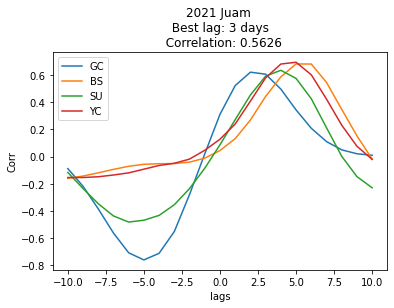

In [31]:
#lag를 3일로 설정하는 것이 유리한데, 평남리와 회문리가 유의미한 결과를 보이지 않는 이유가 주암댐과의 지리적 연관성이 딱히 없어서 그럼. 
#보성군이 영향이 높은 것은 당연한 것. 보성군은 주암댐 바로 앞에 있으니까. 
for dirname in engdir:
    if dirname not in ["PN", "HM"]:
        JAoffsetplot(dirname, -10, 10, heightdf2021, "2021-05-21", "2021-09-10")
    else:
        pass
plt.title("2021 Juam \n Best lag: 3 days \n  Correlation: 0.5626")
#plt.savefig(motherdir2+"2021 JA lag corr best ", dpi=200)

Text(0.5, 1.0, '2019 Juam \n Best lag: 2 days \n 0.482')

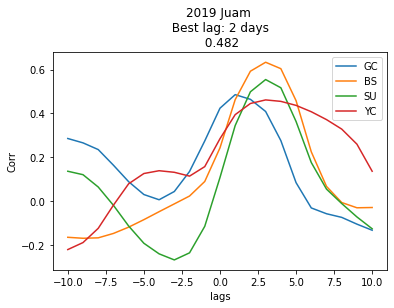

In [32]:
#이제 2019년도 추세 확인

for dirname in engdir:
    if dirname not in ["PN", "HM"]:
        
        JAoffsetplot(dirname, -10, 10, heightdf2019, "2019-05-21", "2019-09-10")
plt.title("2019 Juam \n Best lag: 2 days \n 0.482")
#plt.savefig(motherdir2+"2019 JA lag corr best ", dpi=200)

In [33]:
JA2019=JAoffsetdf(engdir, -10, 10, [1,  3,  5], heightdf2019, "2019-05-21", "2019-09-10")

In [34]:
JA2019.groupby(["lags"])["Corr"].mean()

lags
-10   -0.141048
-9    -0.192175
-8    -0.239167
-7    -0.274415
-6    -0.282675
-5    -0.253454
-4    -0.197200
-3    -0.111333
-2     0.010116
-1     0.163506
 0     0.316371
 1     0.423325
 2     0.492332
 3     0.523269
 4     0.471169
 5     0.367595
 6     0.220492
 7     0.068004
 8    -0.018552
 9    -0.064915
 10   -0.084295
Name: Corr, dtype: float64

Text(0.5, 1.0, '2020 Juam \n Best lag: 2 days \n 0.482')

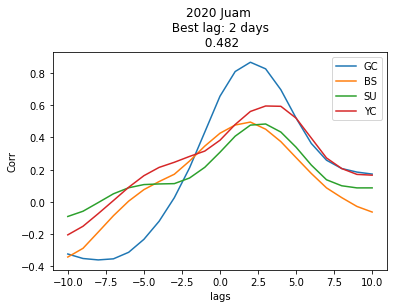

In [35]:
#2020년 확인
for dirname in engdir:
    if dirname not in ["PN", "HM"]:
        
        JAoffsetplot(dirname, -10, 10, heightdf2020, "2020-05-21", "2020-09-10")
plt.title("2020 Juam \n Best lag: 2 days \n 0.482")
#plt.savefig(motherdir2+"2020 JA best lag")

In [36]:
JA2020=JAoffsetdf(engdir, -10, 10, [1,  3,  5], heightdf2020, "2020-05-21", "2020-09-10")
JA2020.groupby(["lags"])["Corr"].mean()

lags
-10   -0.128313
-9    -0.166881
-8    -0.200253
-7    -0.226557
-6    -0.231872
-5    -0.208024
-4    -0.159030
-3    -0.081027
-2     0.033131
-1     0.180639
 0     0.334162
 1     0.438615
 2     0.490691
 3     0.501850
 4     0.444399
 5     0.345092
 6     0.211906
 7     0.076950
 8    -0.001798
 9    -0.047109
 10   -0.070085
Name: Corr, dtype: float64

In [37]:
#방류량-수위 모델 작성 
#train data, test data 작성. 
#사용할 모델. RandomForestRegressor, VotingRegressor, PolynomialFeatures, SVR
#사용할 평가지표: mean_squared_log_error, r2_score, mean_squared_error


In [38]:
#x 데이터부터 시작. 
SJx2021=SJmovingseries(SJoutflux["섬진강"], 1)["2021-05-21":"2021-09-10"]
SJx2019=SJmovingseries(SJoutflux["섬진강"], 1)["2019-05-21":"2019-09-10"]
JAx2021=SJmovingseries(SJoutflux["주암댐"], 1)["2021-05-21":"2021-09-10"]
JAx2019=SJmovingseries(SJoutflux["주암댐"], 1)["2019-05-21": "2019-09-10"]
SJx=pd.concat([SJx2019, SJx2021], axis=0)
JAx=pd.concat([JAx2019, JAx2021], axis=0)
#이동평균은 다 작성했으니 이제 lag 이용
SJx=SJx.shift(11).dropna()
JAx=JAx.shift(-2).dropna()
SJx=SJx.reset_index()
JAx=JAx.reset_index()
Tx=pd.merge(SJx, JAx, how="inner", on="Date")
Tx

,Date,섬진강,주암댐
0,2019-06-01,27.55,13.91
1,2019-06-02,27.60,13.78
2,2019-06-03,30.55,13.72
3,2019-06-04,36.28,13.67
4,2019-06-05,36.10,14.19
...,...,...,...
208,2021-09-04,4.95,18.35
209,2021-09-05,4.97,17.84
210,2021-09-06,5.01,17.88
211,2021-09-07,5.21,17.78


In [39]:
#이제 y 데이터 만들기.
#y가 여러 개 있으니까 지점별로 일단 2019, 2021 concat 하는 함수 작성
def yconcat(point):
    y2021=heightdf2021[point]["2021-06-21":"2021-09-08"]
    y2019=heightdf2019[point]["2019-06-21":"2019-09-08"]
    concated=pd.concat([y2019, y2021], axis=0)
    return concated


In [40]:
GCy=yconcat("GC")
BSy=yconcat("BS")
SUy=yconcat("SU")
YCy=yconcat("YC")
PNy=yconcat("PN")
HMy=yconcat("HM")

ybfs=pd.concat([GCy, BSy, SUy, YCy, PNy, HMy], axis=1)
print(ybfs)

              GC    BS    SU      YC      PN    HM
관측일                                               
2019-06-21  0.41  2.14  3.32  2.0721  1.2500  0.77
2019-06-22  0.41  2.11  3.31  2.0821  1.2417  0.76
2019-06-23  0.41  2.15  3.25  2.3975  1.2500  0.76
2019-06-24  0.62  2.15  3.32  2.1104  1.2400  0.76
2019-06-25  1.05  2.18  3.14  2.0792  1.2400  0.77
...          ...   ...   ...     ...     ...   ...
2021-09-04  1.12  2.20  3.00  2.2192  1.7517  0.69
2021-09-05  1.12  2.19  3.02  2.1850  1.7108  0.68
2021-09-06  1.12  2.19  3.09  2.2267  1.7154  0.68
2021-09-07  1.12  2.19  3.11  2.2204  1.7550  0.68
2021-09-08  1.12  2.19  3.12  2.1871  1.7483  0.69

[160 rows x 6 columns]


In [41]:
yb=ybfs.reset_index()
yb.rename(columns={"관측일":"Date"}, inplace=True )
yb

,Date,GC,BS,SU,YC,PN,HM
0,2019-06-21,0.41,2.14,3.32,2.0721,1.2500,0.77
1,2019-06-22,0.41,2.11,3.31,2.0821,1.2417,0.76
2,2019-06-23,0.41,2.15,3.25,2.3975,1.2500,0.76
3,2019-06-24,0.62,2.15,3.32,2.1104,1.2400,0.76
4,2019-06-25,1.05,2.18,3.14,2.0792,1.2400,0.77
...,...,...,...,...,...,...,...
155,2021-09-04,1.12,2.20,3.00,2.2192,1.7517,0.69
156,2021-09-05,1.12,2.19,3.02,2.1850,1.7108,0.68
157,2021-09-06,1.12,2.19,3.09,2.2267,1.7154,0.68
158,2021-09-07,1.12,2.19,3.11,2.2204,1.7550,0.68


In [42]:
Totaldf=pd.merge(Tx, yb, how="inner", on="Date")
Totaldf.set_index(["Date"], inplace=True)
print(Totaldf)

              섬진강    주암댐    GC    BS    SU      YC      PN    HM
Date                                                            
2019-06-21  31.74  13.74  0.41  2.14  3.32  2.0721  1.2500  0.77
2019-06-22  28.94  12.84  0.41  2.11  3.31  2.0821  1.2417  0.76
2019-06-23  34.85  13.84  0.41  2.15  3.25  2.3975  1.2500  0.76
2019-06-24  34.84  13.59  0.62  2.15  3.32  2.1104  1.2400  0.76
2019-06-25  34.88  12.57  1.05  2.18  3.14  2.0792  1.2400  0.77
...           ...    ...   ...   ...   ...     ...     ...   ...
2021-09-04   4.95  18.35  1.12  2.20  3.00  2.2192  1.7517  0.69
2021-09-05   4.97  17.84  1.12  2.19  3.02  2.1850  1.7108  0.68
2021-09-06   5.01  17.88  1.12  2.19  3.09  2.2267  1.7154  0.68
2021-09-07   5.21  17.78  1.12  2.19  3.11  2.2204  1.7550  0.68
2021-09-08   5.23  17.35  1.12  2.19  3.12  2.1871  1.7483  0.69

[160 rows x 8 columns]


In [43]:
#Totaldf.to_csv(motherdir2+"Totaldf.csv")

In [44]:
df2019=Totaldf[:"2019-09-08"]
df2021=Totaldf["2021-06-21":"2021-09-08"]
df2021.shape

(80, 8)

In [45]:
df2019.describe()

,섬진강,주암댐,GC,BS,SU,YC,PN,HM
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,26.67675,27.643625,0.929750,2.424750,3.395625,2.392345,1.438039,0.808375
std,10.02434,41.915439,0.257225,0.468747,0.118512,0.257757,0.273211,0.081853
min,2.73000,9.570000,0.370000,2.110000,3.140000,2.072100,1.240000,0.760000
25%,25.48750,14.490000,0.820000,2.210000,3.320000,2.239475,1.288000,0.780000
50%,30.15500,16.265000,1.030000,2.240000,3.370000,2.316050,1.355850,0.780000
75%,34.17000,19.917500,1.100000,2.535000,3.470000,2.446125,1.455325,0.800000
max,35.66000,298.120000,1.740000,5.670000,3.900000,3.429600,2.932900,1.330000


In [46]:
#df2021.to_csv(motherdir2+"DF2021.csv")

Text(0, 0.5, 'Water Level')

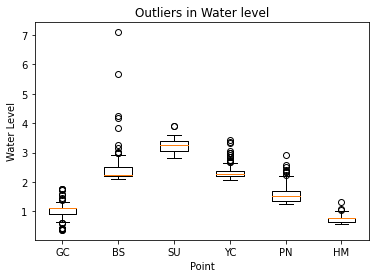

In [47]:

plt.boxplot([Totaldf["GC"], Totaldf["BS"],  Totaldf["SU"], Totaldf["YC"], Totaldf["PN"], Totaldf["HM"]])
plt.xticks([1, 2, 3, 4, 5, 6], engdir)
plt.title("Outliers in Water level")
plt.xlabel("Point")
plt.ylabel("Water Level")
#plt.savefig(motherdir2+"outliers", dpi=200)

In [48]:
#outlier 제거하는 함수 만들기 
def remove_outlier(point, weight=1.5, year=None):
    data=year[[point]]
    level_1q=data.quantile(0.25)
    level_3q=data.quantile(0.75)
    IQR=level_3q-level_1q
    data=data[(data<=level_3q+(weight*IQR) )&( data>=level_1q-(weight*IQR))]
    data.dropna(inplace=True)
    return data
def find_outlier(point, weight=1.5, year=None):
    data=year[[point]]
    level_1q=data.quantile(0.25)
    level_3q=data.quantile(0.75)
    IQR=level_3q-level_1q
    data=data[(data>level_3q+(weight*IQR) ) |( data<level_1q-(weight*IQR))]
    data.dropna(inplace=True)
    return data
#광천교를 예시로 한번 해보자 

In [49]:
poly_PN=PolynomialFeatures(degree=5, include_bias=True)
yb=remove_outlier("PN", weight=1.5, year=df2021)
x=Totaldf[["섬진강"]].loc[yb.index][["섬진강"]]
y=yb.copy()
y=y.values

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=156)
x_poly_PN_train=poly_PN.fit_transform(X_train)
x_poly_PN_test=poly_PN.fit_transform(X_test)
Lr=LinearRegression()
Lr.fit(x_poly_PN_train, y_train)
prd=Lr.predict(x_poly_PN_test)
r2_score(y_test, prd)

0.32370349049609226

In [50]:
#평가지표 별 점수 나타낼 함수 만들기
def RMSE(value):
    return np.sqrt(value)
scorename=["RMSE", "R2", "MSLE"]
def accuracy_score(test=None, real=None):
    global scorelist
    scorelist=[]
    rmse=RMSE(mean_squared_error(test, real))
    print("RMSE score: ", rmse, "\n")
    r2=r2_score(test, real)
    print("r2 score: ", r2, "\n")
    msle=mean_squared_log_error(test, real)
    print("MSLE: ", msle)
    scorelist.append(rmse)
    scorelist.append(r2)
    scorelist.append(msle)
    return scorelist

In [51]:
accuracy_score(y_test, prd)

RMSE score:  0.13754644394852455 

r2 score:  0.32370349049609226 

MSLE:  0.002503640805611607


[0.13754644394852455, 0.32370349049609226, 0.002503640805611607]

In [52]:
#이제 제대로 된 모델 작성해보자
#먼저 쉬운 것부터. 평남리 회문리만
#Randomforestregressor 모델 하나 만들고
#poly-linear도 만들고
#poly-elastic도 만들자

#이후 voting regressor로 voting까지 해보기 


#먼저 지역 입력하면 x, y train, test 데이터까지 만들어주는 함수 작서해보자
def tillsplit(point=None, spec=None, spw=1.5, dam=None):
    y_data=remove_outlier(point, weight=spw, year=spec)
    x=Totaldf[[dam]].loc[y_data.index][[dam]]
    y=y_data.copy()
    y=y.values
    X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=156)
    return X_train, X_test, y_train, y_test, x, y


In [53]:

X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="PN", spec=df2021, spw=1.5, dam="섬진강")
poly_linear=Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())])
PoLr_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8]}
PoLrsearch=GridSearchCV(poly_linear, PoLr_param_grid, n_jobs=2)
PoLrsearch.fit(X_train, y_train)
print(PoLrsearch.best_params_)
    

{'poly__degree': 5}


In [54]:
Best_PoLr=Pipeline([("poly", PolynomialFeatures(degree=5)), ("linear", LinearRegression())])
Best_PoLr.fit(X_train, y_train)
PoLr_pred=Best_PoLr.predict(X_test)
accuracy_score(y_test, PoLr_pred)

RMSE score:  0.13754644394852455 

r2 score:  0.32370349049609226 

MSLE:  0.002503640805611607


[0.13754644394852455, 0.32370349049609226, 0.002503640805611607]

In [55]:
alpha=0.01
l1=0.8

X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="PN", spec=df2021, spw=1.5, dam="섬진강")
poly_elastic=Pipeline([("poly", PolynomialFeatures(degree=2)), ("Elastic", ElasticNet(alpha=alpha, l1_ratio=l1))])
PoEl_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "Elastic__alpha": [0.01, 0.02, 0.03], "Elastic__l1_ratio":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
PoElsearch=GridSearchCV(poly_elastic, PoEl_param_grid, n_jobs=2, cv=3)
PoElsearch.fit(X_train, y_train)
print("Best parameter: ", PoElsearch.best_params_)


Best parameter:  {'Elastic__alpha': 0.03, 'Elastic__l1_ratio': 0.4, 'poly__degree': 7}


In [56]:
BestPoEl=Pipeline([("poly", PolynomialFeatures(degree=7)), ("Elastic", ElasticNet(alpha=0.03, l1_ratio=0.4))])
BestPoEl.fit(X_train, y_train)
PoEl_pred=BestPoEl.predict(X_test)
accuracy_score(y_test, PoEl_pred)

RMSE score:  0.15161239869501975 

r2 score:  0.17831028689828754 

MSLE:  0.003054509650948751


[0.15161239869501975, 0.17831028689828754, 0.003054509650948751]

In [57]:
#randomforest 만들어보고. 지역 알려주면 이 세 가지 모델을 전부 반환할 수 있는 일반화된 함수 작성
#ridge 모델도 활용해야 함. 주어진 학습 데이터에 덜 적합시키는 과정을 통해 과적합을 막자는 것. 

In [58]:
#잔차 정규성 확인 필요. 

#randomforest, PoEl, PoLr, Ridge로 PN과 HM 확인
#다중회귀는 Linear, PoLr, Ridge 를 사용 

In [59]:
Rf=RandomForestRegressor(n_estimators=10, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features="auto")
X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="PN", spec=df2021, spw=1.5, dam="섬진강")
Rf_param_grid={"min_samples_leaf": [1, 2, 4], "n_estimators": [5, 10, 20, 30], "bootstrap": [True, False], "min_samples_split":[1, 2, 3, 4, 5]}
Rfsearch=GridSearchCV(Rf, Rf_param_grid, n_jobs=2, cv=3)
Rfsearch.fit(X_train, y_train)
Rfsearch.best_params_

{'bootstrap': True,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 30}

In [60]:
Best_Rf=RandomForestRegressor(n_estimators=20, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=3, min_samples_leaf=4, max_features="auto")
Best_Rf.fit(X_train, y_train)
Rf_pred=Best_Rf.predict(X_test)
accuracy_score(y_test, Rf_pred)

RMSE score:  0.1439749144320627 

r2 score:  0.2590104719220315 

MSLE:  0.0027243939012968395


[0.1439749144320627, 0.2590104719220315, 0.0027243939012968395]

In [61]:
Rg=Ridge(alpha=0.01)
Rg_param_grid={"alpha": [0.001, 0.01, 0.03, 0.05, 0.1, 0.14]}
Rgsearch=GridSearchCV(Rg, Rg_param_grid, n_jobs=2, cv=3)
Rgsearch.fit(X_train, y_train)
Rgsearch.best_params_

{'alpha': 0.14}

In [62]:
Best_Rg=Ridge(alpha=0.01)
Best_Rg.fit(X_train, y_train)
pred=Best_Rg.predict(X_test)
accuracy_score(y_test, pred)
#Bad model. 폐기할 필요 있음

RMSE score:  0.16810138222247564 

r2 score:  -0.010138633103763839 

MSLE:  0.0037482627082726333


[0.16810138222247564, -0.010138633103763839, 0.0037482627082726333]

In [63]:
#Voting regressor
#상요 모델은 randomforestregressor, PoEl, PoLr
BestPoEl=Pipeline([("poly", PolynomialFeatures(degree=7)), ("Elastic", ElasticNet(alpha=0.03, l1_ratio=0.4))])
Best_PoLr=Pipeline([("poly", PolynomialFeatures(degree=5)), ("linear", LinearRegression())])
Best_Rf=RandomForestRegressor(n_estimators=20, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=3, min_samples_leaf=4, max_features="auto")
VotingR=VotingRegressor([("PoLr", Best_PoLr), ("Rf", Best_Rf), ("PoEl", BestPoEl)])
VotingR.fit(X_train, y_train)
Vpred=VotingR.predict(X_test)
accuracy_score(y_test, Vpred)

RMSE score:  0.1402229194571316 

r2 score:  0.2971277099161327 

MSLE:  0.0025897774232661085


[0.1402229194571316, 0.2971277099161327, 0.0025897774232661085]

Text(0.5, 0, 'a')

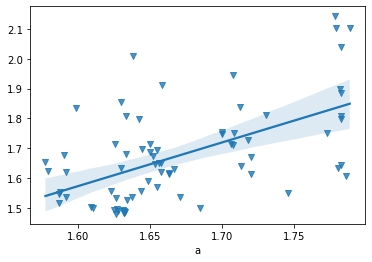

In [64]:
ax=sns.regplot(x=VotingR.predict(total_x), y=total_y, fit_reg=True, marker="v",)
ax.set_xlabel("a")

In [65]:
#일단 plotting은 나중에 하자 
def Plottingaccuracy(model, Total_X_data, Total_y_data, X_train, y_train, X_test, y_test):
    ax=sns.regplot(x=model.predict(Total_X_data), y=Total_y_data)
    ax1=sns.scatterplot()
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    r2=accuracy_score(y_test, pred)
    ax.set_xlabel("Prediction")
    ax.set_ylabel("True value")
    ax.set_title("Regression plot")
   
    


In [66]:
#HM 도 해보자. 

X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="HM", spec=df2021, spw=1.5, dam="섬진강")
poly_linear=Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())])
PoLr_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8]}
PoLrsearch=GridSearchCV(poly_linear, PoLr_param_grid, n_jobs=2)
PoLrsearch.fit(X_train, y_train)
print(PoLrsearch.best_params_)

{'poly__degree': 3}


In [67]:
Best_PoLr=Pipeline([("poly", PolynomialFeatures(degree=3)), ("linear", LinearRegression())])
Best_PoLr.fit(X_train, y_train)
PoLr_pred=Best_PoLr.predict(X_test)
accuracy_score(y_test, PoLr_pred)



RMSE score:  0.038563456433485625 

r2 score:  0.06272678229159057 

MSLE:  0.0005228589439463159


[0.038563456433485625, 0.06272678229159057, 0.0005228589439463159]

In [68]:
alpha=0.01
l1=0.8

X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="HM", spec=df2021, spw=1.5, dam="섬진강")
poly_elastic=Pipeline([("poly", PolynomialFeatures(degree=2)), ("Elastic", ElasticNet(alpha=alpha, l1_ratio=l1))])
PoEl_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "Elastic__alpha": [0.01, 0.02, 0.03], "Elastic__l1_ratio":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
PoElsearch=GridSearchCV(poly_elastic, PoEl_param_grid, n_jobs=2)
PoElsearch.fit(X_train, y_train)
print("Best parameter: ", PoElsearch.best_params_)

Best parameter:  {'Elastic__alpha': 0.03, 'Elastic__l1_ratio': 0.9, 'poly__degree': 1}


In [69]:
BestPoEl=Pipeline([("poly", PolynomialFeatures(degree=1)), ("Elastic", ElasticNet(alpha=0.03, l1_ratio=0.9))])
BestPoEl.fit(X_train, y_train)
PoEl_pred=BestPoEl.predict(X_test)
accuracy_score(y_test, PoEl_pred)

RMSE score:  0.04003909748714733 

r2 score:  -0.010375626629382628 

MSLE:  0.0005660773963336074


[0.04003909748714733, -0.010375626629382628, 0.0005660773963336074]

In [70]:
Rf=RandomForestRegressor(n_estimators=10, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features="auto")
X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="HM", spec=df2021, spw=1.5, dam="섬진강")
Rf_param_grid={"max_depth": [3, 4, 5, 6, 7], "n_estimators": [5, 10, 20, 30, 40, 50, 60, 70, 80], "bootstrap": [True, False], "min_samples_split":[3,  4., 5.]}
Rfsearch=GridSearchCV(Rf, Rf_param_grid, n_jobs=2, cv=3)
Rfsearch.fit(X_train, y_train)
print(Rfsearch.best_params_)
testpred=Rfsearch.best_estimator_.predict(X_test)
accuracy_score(y_test, testpred)
VotingRHM=VotingRegressor([("PoLr", Best_PoLr), ("Rf", Best_Rf), ("PoEl", BestPoEl)])


{'bootstrap': True, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 60}
RMSE score:  0.036984008636027486 

r2 score:  0.1379305284938519 

MSLE:  0.00047844794953234366


In [71]:
def twosplit(point=None, spec=None, spw=1.5, dam=None):
    y_data=remove_outlier(point, weight=spw, year=spec)
    x=Totaldf[dam].loc[y_data.index].values
    y=y_data.copy()
    y=y.values
    X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=156)
    return X_train, X_test, y_train, y_test, x, y

In [72]:
#4개짜리로 넘어가자
#한번에 함수 만들기
#Randomforestregressor, PoLr, Voting
def OneShotRegressor(point, yeardf=None, spw=1.5, dam=["섬진강", "주암댐"]):
    global df2021c
    df2021c=yeardf.copy()

    print(point, "지점에 대한 이야기입니다")
    X_train, X_test, y_train, y_test, total_x, total_y=twosplit(point=point, spec=yeardf, spw=1.5, dam=dam)
    poly_linear=Pipeline([("poly", PolynomialFeatures(degree=degree)), ("linear", LinearRegression())])
    PoLr_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8]}
    PoLrsearch=GridSearchCV(poly_linear, PoLr_param_grid, n_jobs=2, cv=3)
    PoLrsearch.fit(X_train, y_train)
    print("다중다항 hyper: ", PoLrsearch.best_params_, "\n")
    
    Rf=RandomForestRegressor(n_estimators=10, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features="auto")
    Rf_param_grid={"max_depth": [3, 4, 5, 6, 7], "n_estimators": [5, 10, 20, 30, 40, 50, 60, 70, 80], "bootstrap": [True, False], "min_samples_split":[3,  4., 5.]}
    Rfsearch=GridSearchCV(Rf, Rf_param_grid, n_jobs=2, cv=3)
    Rfsearch.fit(X_train, y_train)
    print("랜덤포레스트 hyper: ", Rfsearch.best_params_)
    
    Best_PoLr_M=PoLrsearch.best_estimator_
    Best_Rf_M=Rfsearch.best_estimator_
    Rfpred=Best_Rf_M.predict(X_test)
    print("################ RandomForest Regression ##################")
    Rfaccuracy=accuracy_score(y_test, Rfpred)
    PoLrpred=Best_PoLr_M.predict(X_test)
    print("############### Polynomial Multivariate Regression ###############")
    PoLraccuracy=accuracy_score(y_test, PoLrpred)
    VotingR=VotingRegressor([("PoLr", Best_PoLr_M), ("Rf", Best_Rf_M)])
    VotingR.fit(X_train, y_train)
    Vpred=VotingR.predict(X_test)
    print("################## VotingRegression ############################")
    Vaccuracy=accuracy_score(y_test, Vpred)
    return Best_PoLr_M, Best_Rf_M, VotingR
    
def PredPlotting(model1, model2, model3, point="", lim=None):
    #model1은 PoLr이라서 2차원
    #model2, 3은 1차원
    pred1=pd.Series(model1.predict(df2021.loc[:, ["섬진강", "주암댐"]].values).reshape(-1))
    pred2=pd.Series(model2.predict(df2021.loc[:, ["섬진강", "주암댐"]].values))
    pred3=pd.Series(model3.predict(df2021.loc[:, ["섬진강", "주암댐"]].values))
    wholepred=pd.concat([pred1, pred2, pred3], axis=1)
    wholepred.index=df2021.index
    wholepred.columns=["POLY", "RF", "VOTE"]
    outlier=find_outlier(weight=1.5, year=df2021, point=point)
    plt.title("Predictions-RealValue")
    plt.plot(df2021[point], label="Real", color="k")
    plt.plot(wholepred["POLY"], label="POLY", color="b")
    plt.plot(wholepred["RF"], label="RF", color="g")
    plt.plot(wholepred["VOTE"], label="VOTING", color="r")
    plt.legend(loc="best")
    plt.xlabel("TIME")
    plt.ylabel("Water Level")
    plt.scatter(outlier.index, outlier, marker="v", c="lightgreen", edgecolors="black", label="Outlier")
    if lim:
        plt.ylim(df2021[point].min()-0.025, lim)


   

In [73]:
degree=2

BS 지점에 대한 이야기입니다
다중다항 hyper:  {'poly__degree': 1} 

랜덤포레스트 hyper:  {'bootstrap': True, 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 5}
################ RandomForest Regression ##################
RMSE score:  0.08352007356516472 

r2 score:  0.6655205678361917 

MSLE:  0.0006370537067844903
############### Polynomial Multivariate Regression ###############
RMSE score:  0.09102661623121629 

r2 score:  0.6026945902116145 

MSLE:  0.000791801341177385
################## VotingRegression ############################
RMSE score:  0.07534944545357043 

r2 score:  0.727762591664675 

MSLE:  0.0005412921130498879


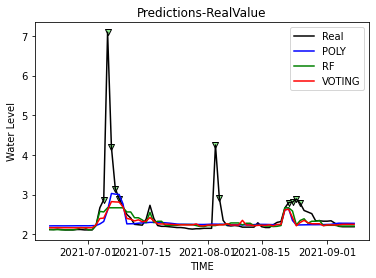

In [74]:
a, b, c=OneShotRegressor("BS", yeardf=df2021, spw=1.5, dam=["섬진강", "주암댐"])
test=PredPlotting(a, b, c, "BS")
#plt.savefig(motherdir2+"BS2021 reg",dpi=200)

GC 지점에 대한 이야기입니다
다중다항 hyper:  {'poly__degree': 1} 

랜덤포레스트 hyper:  {'bootstrap': True, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 70}
################ RandomForest Regression ##################
RMSE score:  0.005950295902345947 

r2 score:  0.7606552958397896 

MSLE:  7.951797809719009e-06
############### Polynomial Multivariate Regression ###############
RMSE score:  0.010247552087002544 

r2 score:  0.2901166912753891 

MSLE:  2.3760196943955328e-05
################## VotingRegression ############################
RMSE score:  0.007380607252194929 

r2 score:  0.6317600633406106 

MSLE:  1.2298785140247074e-05


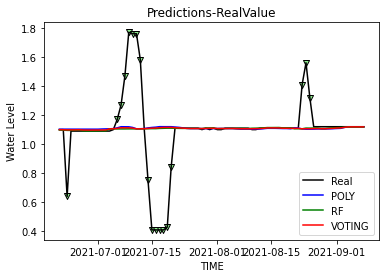

In [75]:
a, b, c=OneShotRegressor("GC", yeardf=df2021, spw=1.5, dam=["섬진강", "주암댐"])
test=PredPlotting(a, b, c, "GC")
#plt.savefig(motherdir2+"GC2021 reg",dpi=200)

SU 지점에 대한 이야기입니다
다중다항 hyper:  {'poly__degree': 1} 

랜덤포레스트 hyper:  {'bootstrap': True, 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 40}
################ RandomForest Regression ##################
RMSE score:  0.11490064302254316 

r2 score:  -0.015062586602125672 

MSLE:  0.0008219216155177925
############### Polynomial Multivariate Regression ###############
RMSE score:  0.1235826436755318 

r2 score:  -0.17425620896364946 

MSLE:  0.0009498195582020507
################## VotingRegression ############################
RMSE score:  0.11512408305437179 

r2 score:  -0.019014281526950283 

MSLE:  0.0008240909509071214


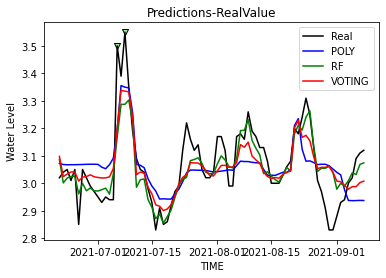

In [76]:
a, b, c=OneShotRegressor("SU", yeardf=df2021, spw=1.5, dam=["섬진강", "주암댐"])
test=PredPlotting(a, b, c, "SU")
#plt.savefig(motherdir2+"SU2021 reg",dpi=200)

YC 지점에 대한 이야기입니다
다중다항 hyper:  {'poly__degree': 1} 

랜덤포레스트 hyper:  {'bootstrap': True, 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 30}
################ RandomForest Regression ##################
RMSE score:  0.03065956056170808 

r2 score:  0.4836874892568085 

MSLE:  9.059934020104362e-05
############### Polynomial Multivariate Regression ###############
RMSE score:  0.04440050827818402 

r2 score:  -0.08282102614212228 

MSLE:  0.0001894009766338253
################## VotingRegression ############################
RMSE score:  0.03604254599857911 

r2 score:  0.28647085103769443 

MSLE:  0.00012450987399798862


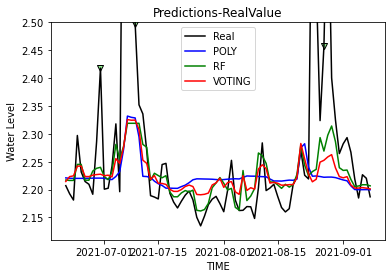

In [77]:
a, b, c=OneShotRegressor("YC", yeardf=df2021, spw=1.5, dam=["섬진강", "주암댐"])
test=PredPlotting(a, b, c, "YC", lim=2.5)
#plt.savefig(motherdir2+"YC2021 reg",dpi=200)

In [78]:
#보고서 마저 쓰기 및 최종 모델 및 시각화까지

In [79]:
def SOneShotRegressor(point, yeardf=None, spw=1.5, dam="섬진강"):
    global df2021c
    df2021c=yeardf.copy()

    Rf=RandomForestRegressor(n_estimators=10, bootstrap=True, criterion="mse", max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features="auto")
    X_train, X_test, y_train, y_test, total_x, total_y=tillsplit(point="HM", spec=df2021, spw=1.5, dam="섬진강")
    Rf_param_grid={"max_depth": [3, 4, 5, 6, 7], "n_estimators": [ 30, 40, 50, 60, 70, 80], "bootstrap": [True, False], "min_samples_split":[3,  4., 5.]}
    Rfsearch=GridSearchCV(Rf, Rf_param_grid, n_jobs=2, cv=3)
    Rfsearch.fit(X_train, y_train)
    print(point, "지점에 대한 이야기입니다")
    print("################ RandomForest Regression ##################")
    print("RandomForest hyper: ", Rfsearch.best_params_, "\n")
    
    Best_Rf=Rfsearch.best_estimator_
    
    Rfpred=Best_Rf.predict(X_test)
    Rfaccuracy=accuracy_score(y_test, Rfpred)
    print("############### Polynomial Elasticnet Regression ###############")
    poly_elastic=Pipeline([("poly", PolynomialFeatures(degree=2)), ("Elastic", ElasticNet(alpha=alpha, l1_ratio=l1))])
    PoEl_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "Elastic__alpha": [0.01, 0.02, 0.03], "Elastic__l1_ratio":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
    PoElsearch=GridSearchCV(poly_elastic, PoEl_param_grid, n_jobs=2)
    PoElsearch.fit(X_train, y_train)
    Best_PoEl=PoElsearch.best_estimator_
    PoElpred=Best_PoEl.predict(X_test)
    PoElaccuracy=accuracy_score(y_test, PoElpred)
    
    print("Best parameter: ", PoElsearch.best_params_)
    
    print("################## PolyLinear ############################")
    poly_linear=Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())])
    PoLr_param_grid={"poly__degree": [1, 2, 3, 4, 5, 6, 7, 8]}
    PoLrsearch=GridSearchCV(poly_linear, PoLr_param_grid, n_jobs=2)
    PoLrsearch.fit(X_train, y_train)
    print(PoLrsearch.best_params_)
    BestPoLr=PoLrsearch.best_estimator_
    PoLrpred=BestPoLr.predict(X_test)
    PoLraccuracy=accuracy_score(y_test, PoLrpred)
    
    
  
    return Best_Rf, Best_PoEl, BestPoLr
    
def SPredPlotting(model1, model2, model3, point="", lim=None):
    #model1은 PoLr이라서 2차원
    #model2, 3은 1차원
    pred1=pd.Series(model1.predict(df2021.loc[:, "섬진강"].values.reshape(-1, 1)))
    pred2=pd.Series(model2.predict(df2021.loc[:, "섬진강"].values.reshape(-1, 1)))
    pred3=pd.Series(model3.predict(df2021.loc[:, "섬진강"].values.reshape(-1, 1)).reshape(-1))
    wholepred=pd.concat([pred1, pred2, pred3], axis=1)
   

    wholepred.index=df2021.index
    wholepred.columns=["RF", "POLY-EL", "POLY"]
    outlier=find_outlier(weight=1.5, year=df2021, point=point)
    plt.title("Predictions-RealValue")
    plt.plot(df2021[point], label="Real", color="k")
    plt.plot(wholepred["RF"], label="RF", color="b")
    plt.plot(wholepred["POLY-EL"], label="POLY-EL", color="g")
    plt.plot(wholepred["POLY"], label="POLY", color="r")
    plt.legend(loc="best")
    plt.xlabel("TIME")
    plt.ylabel("Water Level")
    plt.scatter(outlier.index, outlier, marker="v", c="lightgreen", edgecolors="black", label="Outlier")
    if lim:
        plt.ylim(df2021[point].min()-0.025, lim)


HM 지점에 대한 이야기입니다
################ RandomForest Regression ##################
RandomForest hyper:  {'bootstrap': True, 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 80} 

RMSE score:  0.03837794065142069 

r2 score:  0.0717229021151462 

MSLE:  0.000516545638123163
############### Polynomial Elasticnet Regression ###############
RMSE score:  0.04003909748714733 

r2 score:  -0.010375626629382628 

MSLE:  0.0005660773963336074
Best parameter:  {'Elastic__alpha': 0.03, 'Elastic__l1_ratio': 0.9, 'poly__degree': 1}
################## PolyLinear ############################
{'poly__degree': 3}
RMSE score:  0.038563456433485625 

r2 score:  0.06272678229159057 

MSLE:  0.0005228589439463159


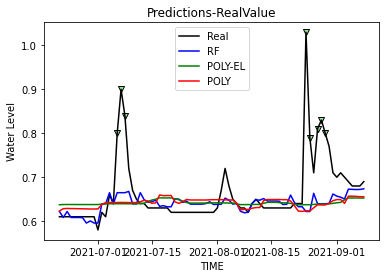

In [80]:
a, b, c=SOneShotRegressor(point="HM", yeardf=df2021, spw=1.5, dam="섬진강")
SPredPlotting(a, b, c, point="HM", lim=None)
plt.savefig(motherdir2+"HM 2021 reg", dpi=200)

PN 지점에 대한 이야기입니다
################ RandomForest Regression ##################
RandomForest hyper:  {'bootstrap': True, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 40} 

RMSE score:  0.03687194338661098 

r2 score:  0.1431469270343837 

MSLE:  0.00047507104399621464
############### Polynomial Elasticnet Regression ###############
RMSE score:  0.04003909748714733 

r2 score:  -0.010375626629382628 

MSLE:  0.0005660773963336074
Best parameter:  {'Elastic__alpha': 0.03, 'Elastic__l1_ratio': 0.9, 'poly__degree': 1}
################## PolyLinear ############################
{'poly__degree': 3}
RMSE score:  0.038563456433485625 

r2 score:  0.06272678229159057 

MSLE:  0.0005228589439463159


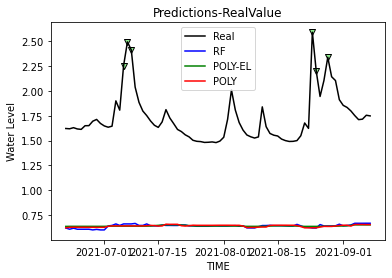

In [82]:
a, b, c=SOneShotRegressor(point="PN", yeardf=df2021, spw=1.5, dam="섬진강")
SPredPlotting(a, b, c, point="PN", lim=None)
plt.savefig(motherdir2+"PN 2021 reg", dpi=200)